# Hualpén Epidemiology Surveillance Analytics

## Background <a name="background"></a>

This project emerged from a field experience in a healthcare center in Hualpén, Chile, where I had the chance to shadow and collaborate with the clinician in charge of epidemiology surveillance and technical operations at a healthcare center.

## Introduction <a name="introduction"></a>

Infectious diseases, also known as transmissible or communicable diseases, are a significant public health concern worldwide. These diseases can spread from person to person through various modes of transmission, such as respiratory droplets, contaminated food and water, or insect vectors. Given their potential to cause outbreaks and impact communities, effective monitoring and surveillance of infectious diseases are vital. Healthcare systems employ surveillance methods to track and identify outbreaks, monitor disease trends, and implement timely interventions to prevent further transmission.

This project revolves around harnessing epidemiological surveillance data to develop a valuable tool that supports public health roles in outbreak prevention and health promotion. My goal was to turn raw data into an interactive dashboard capable of deriving valuable insights, empowering healthcare professionals to take proactive measures and make informed decisions to safeguard communities from potential outbreaks and promote overall public health.

1. [Background](#background)
2. [Introduction](#introduction)
3. [Project Objectives](#project-objectives)
4. [Data Sources](#data-sources)
5. [Data Preparation and Transformation](#data-preparation-and-transformation)
6. [Exploratory Visualizations](#exploratory-visualizations)
7. [Data Export](#data-export)
8. [Epidemiology Surveillance Dashboard](#epidemiology-surveillance-dashboard)
   - [Overview](#overview)
   - [Age Group Analysis](#age-group-analysis)
   - [Geographical Analysis](#geographical-analysis)
   - [Temporal Trend Analysis](#temporal-trend-analysis)
9. [Recommendations](#recommendations)
10. [Future Considerations](#future-considerations)

## Project Objectives <a name="project-objectives"></a>

This project ecompassed various objectives, including:

1. Ensure Data Anonymization: Given the sensitive nature of patient data, a critical objective was to ensure data anonymization. By removing any identifiable information before loading the data into the working environment, this project adhered to privacy and security regulations.
2. Create Interactive Dashboard for Visual Insights: A key objective of this project was to design and build an interactive dashboard using Power BI. The dashboard was intended to enable users to explore and interact with the data, providing visual insights into reported cases of transmissible and communicable diseases over the years.
3. Improve Public Health Decision-Making: The ultimate objective was to contribute to improved public health decision-making in Hualpén. The dashboard's data-driven insights and visualizations would empower healthcare professionals and policymakers to make informed choices and take proactive measures to combat communicable diseases.

## Data Sources <a name="data-sources"></a>

This project utilizes epidemiology surveillance data from Hualpén, collected over the period 2011 to 2016, from reported cases of transmissible and communicable diseases.

In the file epi-hualpen-data.csv, the following information is available:

| Column Name | Description                                          |
|-------------|------------------------------------------------------|
| age group   | Age range to which each patient belongs to.         |
| year        | Year of the reported case.                          |
| month       | Month of the reported case.                         |
| street      | Approximate street address where the patient lived. |
| diagnosis   | Transmissible/communicable disease.                 |

Reference Age Groups:

| Age Group     | Age Range                           |
|---------------|-------------------------------------|
| Infant        | Age less than or equal to 1 year    |
| Preschool     | Age greater than 1 year and less than or equal to 5 years    |
| School Age    | Age greater than 5 years and less than or equal to 12 years   |
| Adolescent    | Age greater than 12 years and less than or equal to 19 years  |
| Young Adult   | Age greater than 19 years and less than or equal to 40 years  |
| Adult         | Age greater than 40 years and less than or equal to 65 years  |
| Elderly       | Age greater than 65 years          |

## Data Preparation and Transformation <a name="data-preparation-and-transformation"></a>
Previous steps done in spreasheets, for data anonymization:
* Standarized the data in table format.
* Extracted year and month from the date the case was reported.
* Deleted columns with any direct personal data (RUT, full name, date the case was reported).
* Extracted age number from string column.
* Created age groups, and deleted any other age related column.
* Extracted street name from street address.
* Deleted street and general direction columns, and removed any numbers from extracted streets names, to avoid leaving any personal identifiable data.

Steps within this notebook:

* Translated the names of diagnosis and months.
* Translated and transformed the names of the age groups, to visualize age range in dashboard.
* Checked for nulls values.

In [1]:
# Importing libraries and loading data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Setting plot style
plt.style.use('ggplot')

# Load the data from the csv file
epi = pd.read_csv('data/epi-hualpen-data.csv', sep=';', encoding='latin-1')

In [2]:
# Translating and transforming data

# Dictionary to store the diagnosis translations
diagnosis_translation_dict = {
    'Hepatitis A': 'Hepatitis A',
    'Hepatitis B': 'Hepatitis B',
    'Coqueluche': 'Pertussis',
    'ETA': 'Foodborne disease',
    'Influenza': 'Influenza',
    'Parotiditis': 'Mumps',
    'Sífilis': 'Syphilis',
    'TBC': 'Tuberculosis',
}

epi['diagnosis'] = epi['diagnosis'].replace(diagnosis_translation_dict)


# Dictionary to store the age group translations
age_group_translation_dict = {
    'Lactante': 'Infant (<= 1)',
    'Preescolar': 'Preschool (1 - 5)',
    'Escolar': 'School Age (6 - 12)',
    'Adolescente': 'Adolescent (13 - 19)',
    'Adulto Joven': 'Young Adult (20 - 40)',
    'Adulto': 'Adult (41 - 65)',
    'Adulto Mayor': 'Elderly (> 65)',
}

# Translate the 'Grupo Etario' column to English using the replace() method
epi['age group'] = epi['age group'].replace(age_group_translation_dict)


# Define the translation dictionary for months
month_translation_dict = {
    'enero': 'January',
    'febrero': 'February',
    'marzo': 'March',
    'abril': 'April',
    'mayo': 'May',
    'junio': 'June',
    'julio': 'July',
    'agosto': 'August',
    'septiembre': 'September',
    'octubre': 'October',
    'noviembre': 'November',
    'diciembre': 'December'
}

# Replace the months with their translated values
epi['month'] = epi['month'].replace(month_translation_dict)

# Print basic statistics and info about the DataFrame
print(epi.describe())
print(epi.info())

              year
count   114.000000
mean   2015.052632
std       1.253964
min    2011.000000
25%    2015.000000
50%    2015.000000
75%    2016.000000
max    2016.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age group  114 non-null    object
 1   year       114 non-null    int64 
 2   month      114 non-null    object
 3   street     114 non-null    object
 4   diagnosis  114 non-null    object
dtypes: int64(1), object(4)
memory usage: 4.6+ KB
None


## Exploratory Visualizations <a name="exploratory-visualizations"></a>

In this section we added a custom palette for the colors of diagnosis, to use them later in the dashboard for consistency.

And included visualizations to identify the most common diagnosis, and their frequency in each month, across the period 2011 to 2016.

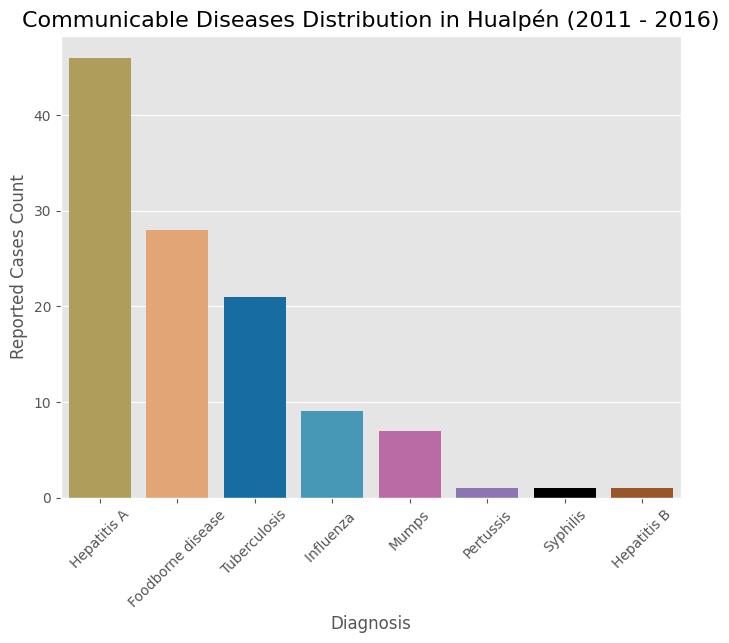

In [3]:
# Creating custom color palette in a dictionary
diagnosis_colors = {
    'Hepatitis A': '#BDA54D',
    'Hepatitis B': '#AC5316',
    'Pertussis': '#8A6BBE',
    'Foodborne disease': '#F4A363',
    'Influenza': '#33A1C9',
    'Mumps': '#C75DAB',
    'Syphilis': '#000000',
    'Tuberculosis': '#0073B7',
}

# Get the counts of each diagnostic category and sort in descending order
diagnostic_counts = epi['diagnosis'].value_counts().sort_values(ascending=False)

# Create the custom color palette as a list of colors in the order of unique diagnoses
custom_palette = [diagnosis_colors[diagnosis.strip()] for diagnosis in diagnostic_counts.index]

# Create the bar plot using Seaborn with the custom color palette and sorted data
plt.figure(figsize=(8, 6))
sns.countplot(x='diagnosis', data=epi, order=diagnostic_counts.index, palette=custom_palette)

# Customize the plot labels and title
plt.title('Communicable Diseases Distribution in Hualpén (2011 - 2016)', fontsize=16)
plt.xlabel('Diagnosis', fontsize=12)
plt.ylabel('Reported Cases Count', fontsize=12)

# Rotate the x-axis labels
plt.xticks(rotation=45)

# Display the plot
plt.show()


This plot reveals distinct patterns in the distribution of reported cases. The top 2 diagnosis correspond to gastrointestinal or food-related diseases, with Hepatitis A and Foodborne disease accounting for the highest number of cases. The next highest diagnosis consists of respiratory-related diseases, with Tuberculosis and Influenza.

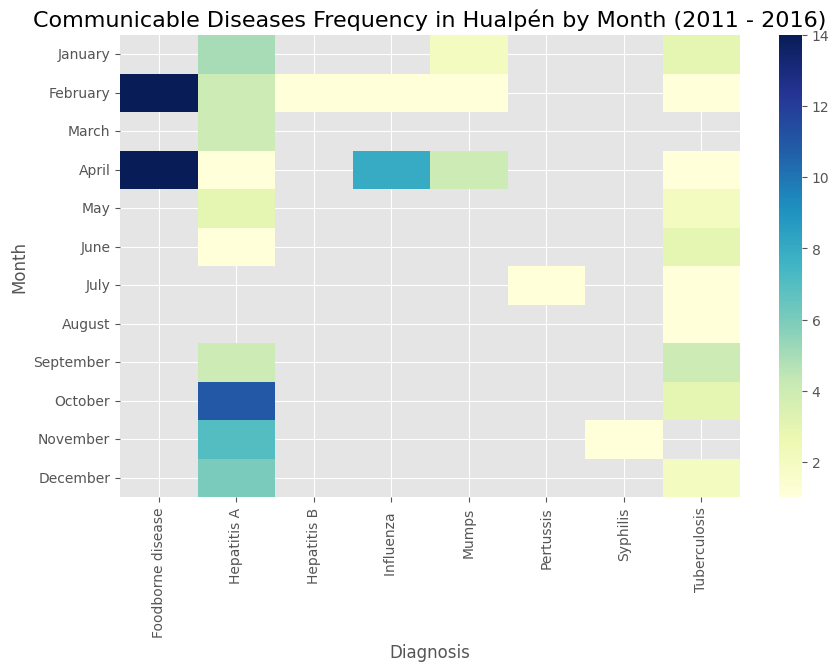

In [4]:
# Create a list of month names in the correct order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
               'August', 'September', 'October', 'November', 'December']

# Group by 'month' and 'diagnosis', and count occurrences
diagnosis_counts_per_month = epi.groupby(['month', 'diagnosis']).size().reset_index(name='count')

# Convert the 'month' column to a categorical variable with the correct ordering
diagnosis_counts_per_month['month'] = pd.Categorical(diagnosis_counts_per_month['month'], categories=month_order, ordered=True)

# Create the pivot table
diagnosis_counts_pivot = diagnosis_counts_per_month.pivot(index='month', columns='diagnosis', values='count')

# Create the heatmap using Seaborn without numerical annotations
plt.figure(figsize=(10, 6))
sns.heatmap(diagnosis_counts_pivot, cmap='YlGnBu')

# Customize the plot labels and title
plt.title('Communicable Diseases Frequency in Hualpén by Month (2011 - 2016)', fontsize=16)
plt.xlabel('Diagnosis', fontsize=12)
plt.ylabel('Month', fontsize=12)

# Display the plot
plt.show()

The heatmap showcases some interesting points regarding the seemingly seasonal patterns for some communicable diseases. Such visualizations offer valuable insights that could improve prevention opportunities by targeting certain key periods of the year to strengthen informative campaings for certain diseases.

## Data Export <a name="data-export"></a>

The translated and transformed data is exported from this Google Colab Notebook, for later use in Power BI.

In [5]:
# Export the DataFrame 'epi' to a new CSV file with the transformed data
epi.to_csv('transformed-epi-hualpen-data.csv', index=False)

In [6]:
# Check if the file was saved
import os
os.listdir()

['.config',
 '.ipynb_checkpoints',
 'transformed-epi-hualpen-data.csv',
 'epi-hualpen-data.csv']

In [7]:
# Export the csv file <- Only run this cell if you want to download this file, it will already be included in the repository.
from google.colab import files
files.download('transformed-epi-hualpen-data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Epidemiology Surveillance Dashboard <a name="epidemiology-surveillance-dashboard"></a>

In this section we explore this interactive dashboard created in Power BI, which can offer valuable insights that shed light on communicable diseases trends and patterns from 2011 to 2016. It's goal is to gain actionable information to strengthen preventive measures and enhance public health efforts.

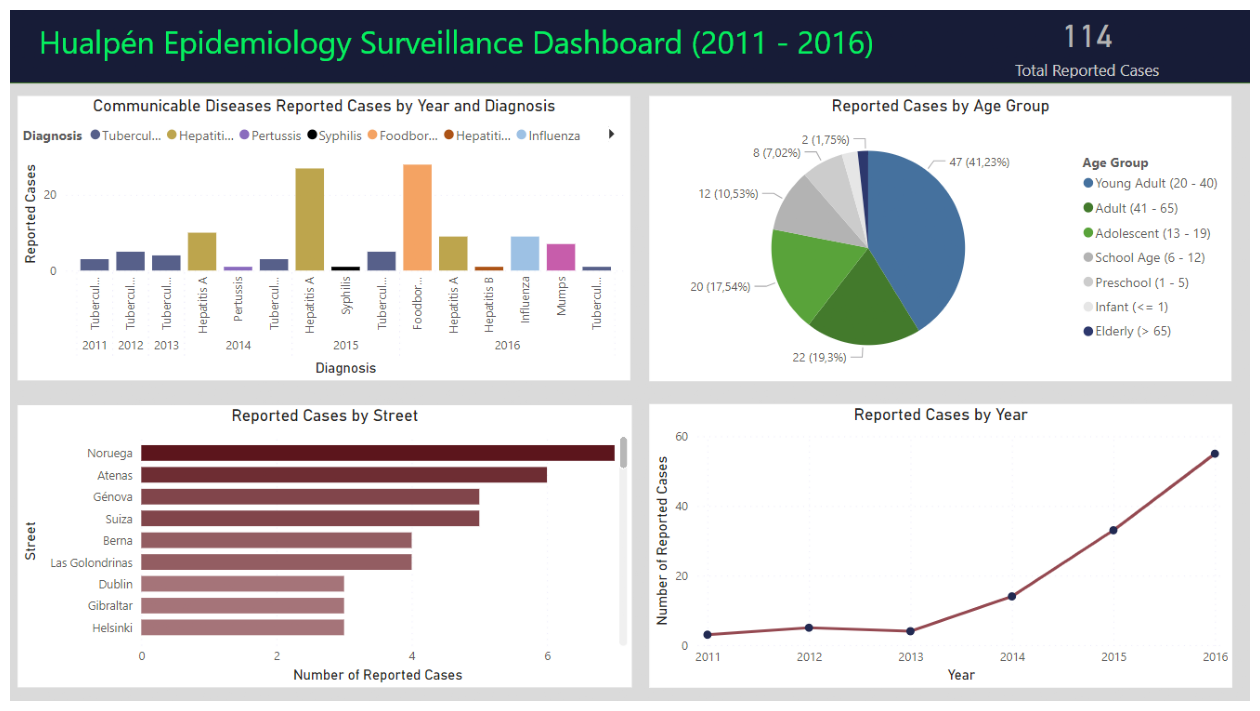

In [15]:
import matplotlib.image as mpimg

# Path to the image file
image_path = 'images/hualpen-epi-dashboard.png'

# Load and display the image
img = mpimg.imread(image_path)

# Set the figure size
plt.figure(figsize=(16, 12))

# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()

### Overview <a name="overview"></a>
* Total Reported Cases: During the six-year period, a total of 114 communicable disease cases were reported and recorded in the system.

* Tuberculosis Regularity: Tuberculosis diagnosis exhibits a regularity, being reported in each of the six years, although the number of cases remained relatively low.

* Food-related illnesses: From 2013 to 2015, Hepatitis A emerged as one of the most prevalent diagnoses, while a surprising uptick in Foodborne disease cases was observed during 2015.

### Demographics <a name="demographics"></a>

Distribution of reported cases across different age groups, highlighting the highest three groups:

| Age Group      | Percentage of Reported Cases |
| -------------- | --------------------------- |
| Young Adults   | 41.23%                      |
| Adult  | 19.3%                      |
| Adolescent | 17.54%                      |

### Geographical Analysis <a name="geographical-analysis"></a>

The list of streets with the number of reported cases can be a powerful tool for identifying disease clusters and directing public health resources efficiently. By pinpointing areas where cases are reported regularly over the years, there can be targeted interventions in these zones, and can aid in early detection and swift response to potential outbreaks, helping to prevent further transmission and protect the overall community health.

### Temporal Trend Analysis: <a name="temporal-trend-analysis"></a>

The temporal trend analysis indicates a gradual increase in reported cases over the years. Several factors could contribute to this observed rise, including evolving reporting protocols, or increased awareness leading to better detection and reporting.

Understanding the underlying reasons for this trend is crucial for devising effective strategies to mitigate the impact of communicable diseases. Further research might be needed to identify the potential reasons.

## Recommendations <a name="recommendations"></a>

Based on the insights gained from the interactive dashboard, actionable recommendations can be formulated to bolster disease control and enhance public health efforts in Hualpén.

Key recommendations:
1. Strengthening Preventive Measures: Implement targeted preventive measures, such as vaccination campaigns and health education programs, especially for high-risk age groups like Young Adults, and high-risk individuals.

2. Enhancing Surveillance Systems: Continuously improve and expand the epidemiological surveillance systems to enhance early detection and timely response to disease outbreaks.

3. Promoting Awareness: Launch public awareness campaigns to educate the community about communicable diseases, their transmission, and preventive measures to foster a culture of health-consciousness.

4. Data-Driven Decision-Making: Use data insights from the dashboard to inform evidence-based decision-making for resource allocation and intervention strategies.

## Future Considerations <a name="future-considerations"></a>
By adopting this tool and regularly updating the dataset to include more recent years, the dashboard can offer a dynamic and up-to-date view of communicable disease occurrences in Hualpén.

Integrating socio-economic data, and other factors like climate and enviromental data, may offer a comprehensive understanding of the determinants of disease transmission and help in designing more targeted public health interventions.